# NATURAL LANGUAGE PROCESSING SWE1017

# <font color=red>Topic: </font>Sentiment Analysis on Amazon Customer Reviews

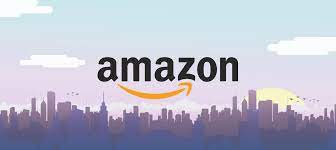

## By, 
### <font color=red> SHIVANI GOKULRAM NAIDU(19MIA1006)
### <font color=red> MADASU DEEPIKA(19MIA1066)             
### <font color=red> G.HARINISRI(19MIA1069)<font/>

## Importing all the important Libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from keras.preprocessing.sequence import pad_sequences

from collections import Counter
import nltk
import seaborn as sns
import string
from nltk.corpus import stopwords
# import re
# from autocorrect import spell
import regex as re

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import eval
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D,MaxPooling1D

from wordcloud import WordCloud
from textwrap import wrap
from textblob import TextBlob
import nltk
import nltk.corpus
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
import nltk.corpus

## Loading & Reading dataset

In [4]:
data=pd.read_csv('1429_1.csv')
data.head()

C:\Users\Madasu Deepika\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


## Data Analysis & Preprocessing

In [5]:
data.drop('id',axis=1,inplace=True)
data.drop('asins',axis=1,inplace=True)
data.drop('keys',axis=1,inplace=True)

In [6]:
data.drop('manufacturer',axis=1,inplace=True)
data.drop('reviews.id',axis=1,inplace=True)
data.drop('reviews.sourceURLs',axis=1,inplace=True)
data.drop('reviews.userCity',axis=1,inplace=True)
data.drop('reviews.userProvince',axis=1,inplace=True)
data.drop('reviews.didPurchase',axis=1,inplace=True)
 
data.drop('reviews.dateAdded',axis=1,inplace=True)
data.drop('reviews.dateSeen',axis=1,inplace=True)

In [7]:
#remove empty rows
data = data[~data['reviews.text'].isnull()]
data = data[~data['reviews.doRecommend'].isnull()]
data = data[~data['reviews.numHelpful'].isnull()]
data = data[~data['reviews.rating'].isnull()]

In [8]:
#preprocessing
data['reviews.title'] = data['reviews.title'].apply(lambda x: str(x).lower())
data['reviews.title'] = data['reviews.title'].apply(lambda x: re.sub('\w*\d\w*','', x))
#data['reviews.title'] = data['reviews.title'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

data['reviews.text'] = data['reviews.text'].apply(lambda x: str(x).lower())
data['reviews.text'] = data['reviews.text'].apply(lambda x: re.sub('\w*\d\w*','', x))
#data['reviews.text'] = data['reviews.text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [9]:
data.shape #shape

(34064, 10)

In [10]:
data.info() #information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34064 entries, 0 to 34624
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 27409 non-null  object 
 1   brand                34064 non-null  object 
 2   categories           34064 non-null  object 
 3   reviews.date         34064 non-null  object 
 4   reviews.doRecommend  34064 non-null  object 
 5   reviews.numHelpful   34064 non-null  float64
 6   reviews.rating       34064 non-null  float64
 7   reviews.text         34064 non-null  object 
 8   reviews.title        34064 non-null  object 
 9   reviews.username     34062 non-null  object 
dtypes: float64(2), object(8)
memory usage: 2.9+ MB


In [11]:
# Finding the number of unique values present in each column
data.nunique()

name                      44
brand                      4
categories                23
reviews.date             943
reviews.doRecommend        2
reviews.numHelpful        57
reviews.rating             5
reviews.text           34061
reviews.title          17567
reviews.username       26312
dtype: int64

In [12]:
# Checking if any NaN is present in column or not
data.isna().any()

name                    True
brand                  False
categories             False
reviews.date           False
reviews.doRecommend    False
reviews.numHelpful     False
reviews.rating         False
reviews.text           False
reviews.title          False
reviews.username        True
dtype: bool

## Data Visualisation

### 1. Heap Map

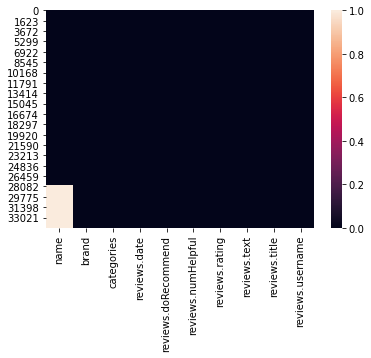

In [14]:
# Checking for null value using heatmap
sns.heatmap(data.isnull())

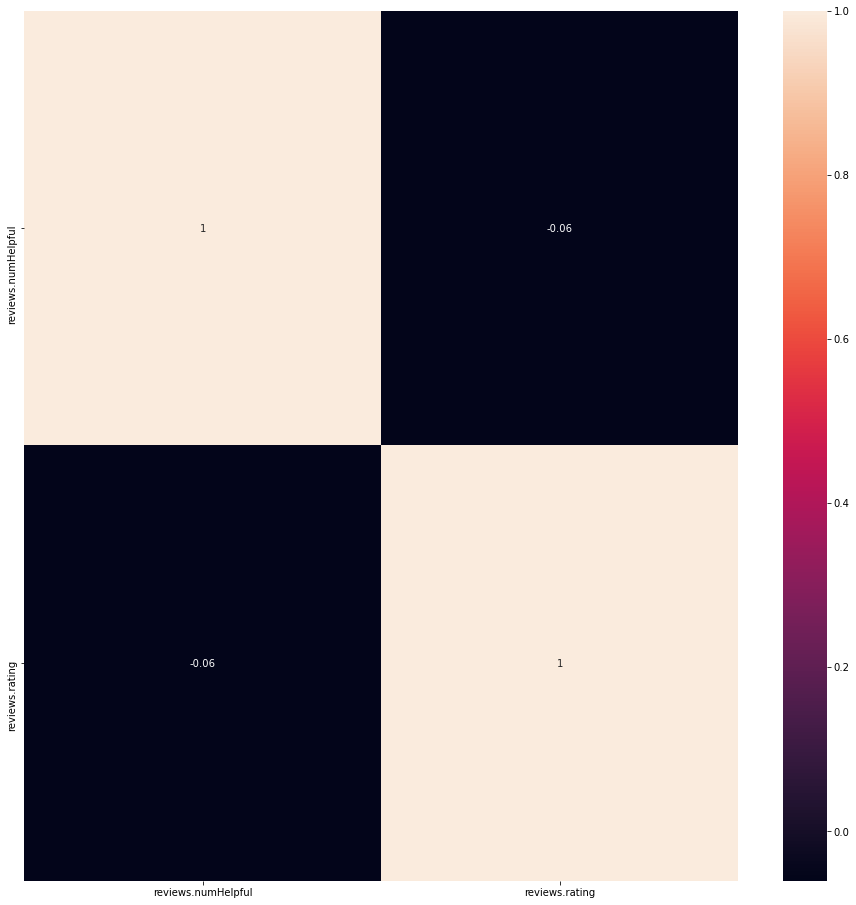

In [15]:
# Finding the correlation between the feature column
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [16]:
# Checking for correlation by unstacking data
corr = data.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[24:50:2]

Series([], dtype: float64)

### Bar Graph

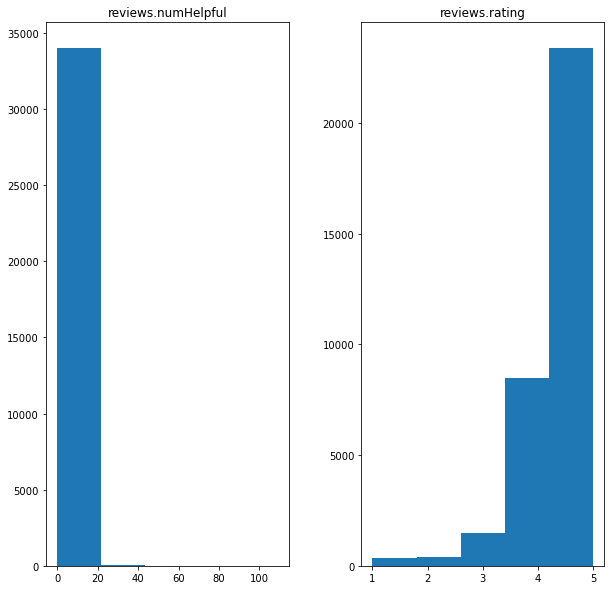

In [19]:
plot_features = ['reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating']
p =data[plot_features].hist(figsize = (10,10), grid=False, bins=5)

In [20]:
#FOR VISUALISATION PURPOSE ALONE ADD ID COLUMN AND REMOVE LATER
category_dict={}
for i,key in enumerate(dict(data['categories'].value_counts()).keys()):
    category_dict[key]=i
 
data['cat_id'] = data['categories'].apply(lambda category:category_dict[category])

In [21]:
#format date
data['reviews.date'] = pd.to_datetime(data['reviews.date'])
data['reviews.month'] = data['reviews.date'].dt.month
data['reviews.year'] = data['reviews.date'].dt.year

In [22]:
#Encode Reviews.recommend column
data['reviews.doRecommend'] = data['reviews.doRecommend'].apply(lambda t:1 if t==True else 0)

In [23]:
#Add new features based on length & word count of reviews
data['review_len'] = data['reviews.text'].astype(str).apply(len)
data['word_count'] = data['reviews.text'].apply(lambda x: len(str(x).split()))

In [24]:
data['polarity']=data['reviews.text'].map(lambda text: TextBlob(text).sentiment.polarity)

C:\Users\Madasu Deepika\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


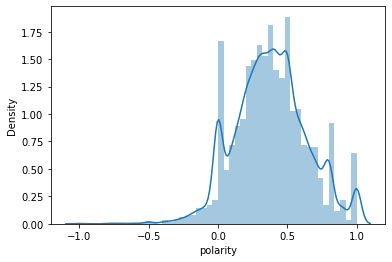

In [25]:
#DISTRIBUTION OF POLARITY
sns.distplot(data["polarity"],hist=True)

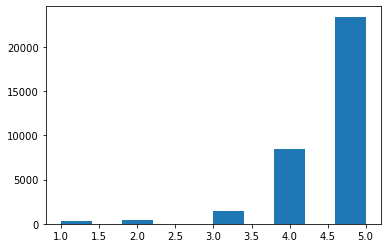

In [26]:
#DISTRIBUTION OF REVIEW RATING
plt.hist(data['reviews.rating'])
plt.show()

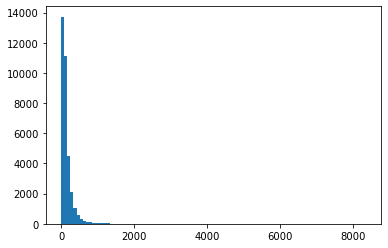

In [27]:
#Distribution of review Length
plt.hist(data['review_len'],bins=100)
plt.show()

C:\Users\Madasu Deepika\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


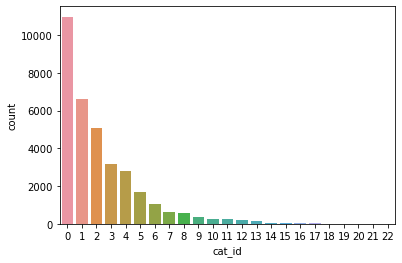

In [28]:
#Distribution of Product Categories
sns.countplot(data['cat_id'])
plt.show()

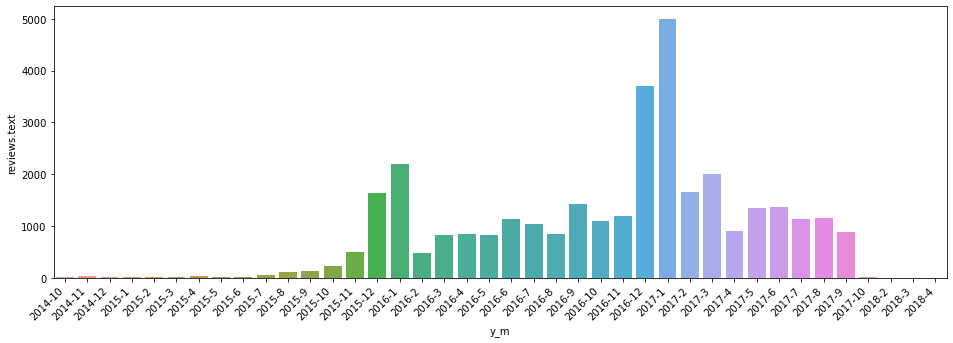

In [29]:
#Distribution of month of reviews
df_y_m=data.groupby(['reviews.year','reviews.month'])['reviews.text'].agg('count').reset_index()
 
df_y_m['y_m'] = df_y_m[['reviews.year','reviews.month']].astype(str).agg('-'.join, axis=1)
 
fig,ax =plt.subplots(figsize = (16,5))
 
fig = sns.barplot(x = "y_m", y = "reviews.text", data = df_y_m, 
                  estimator = sum, ci = None, ax=ax)
 
ax.set_xticklabels(labels=df_y_m['y_m'], rotation=45, ha='right')
 
plt.show()

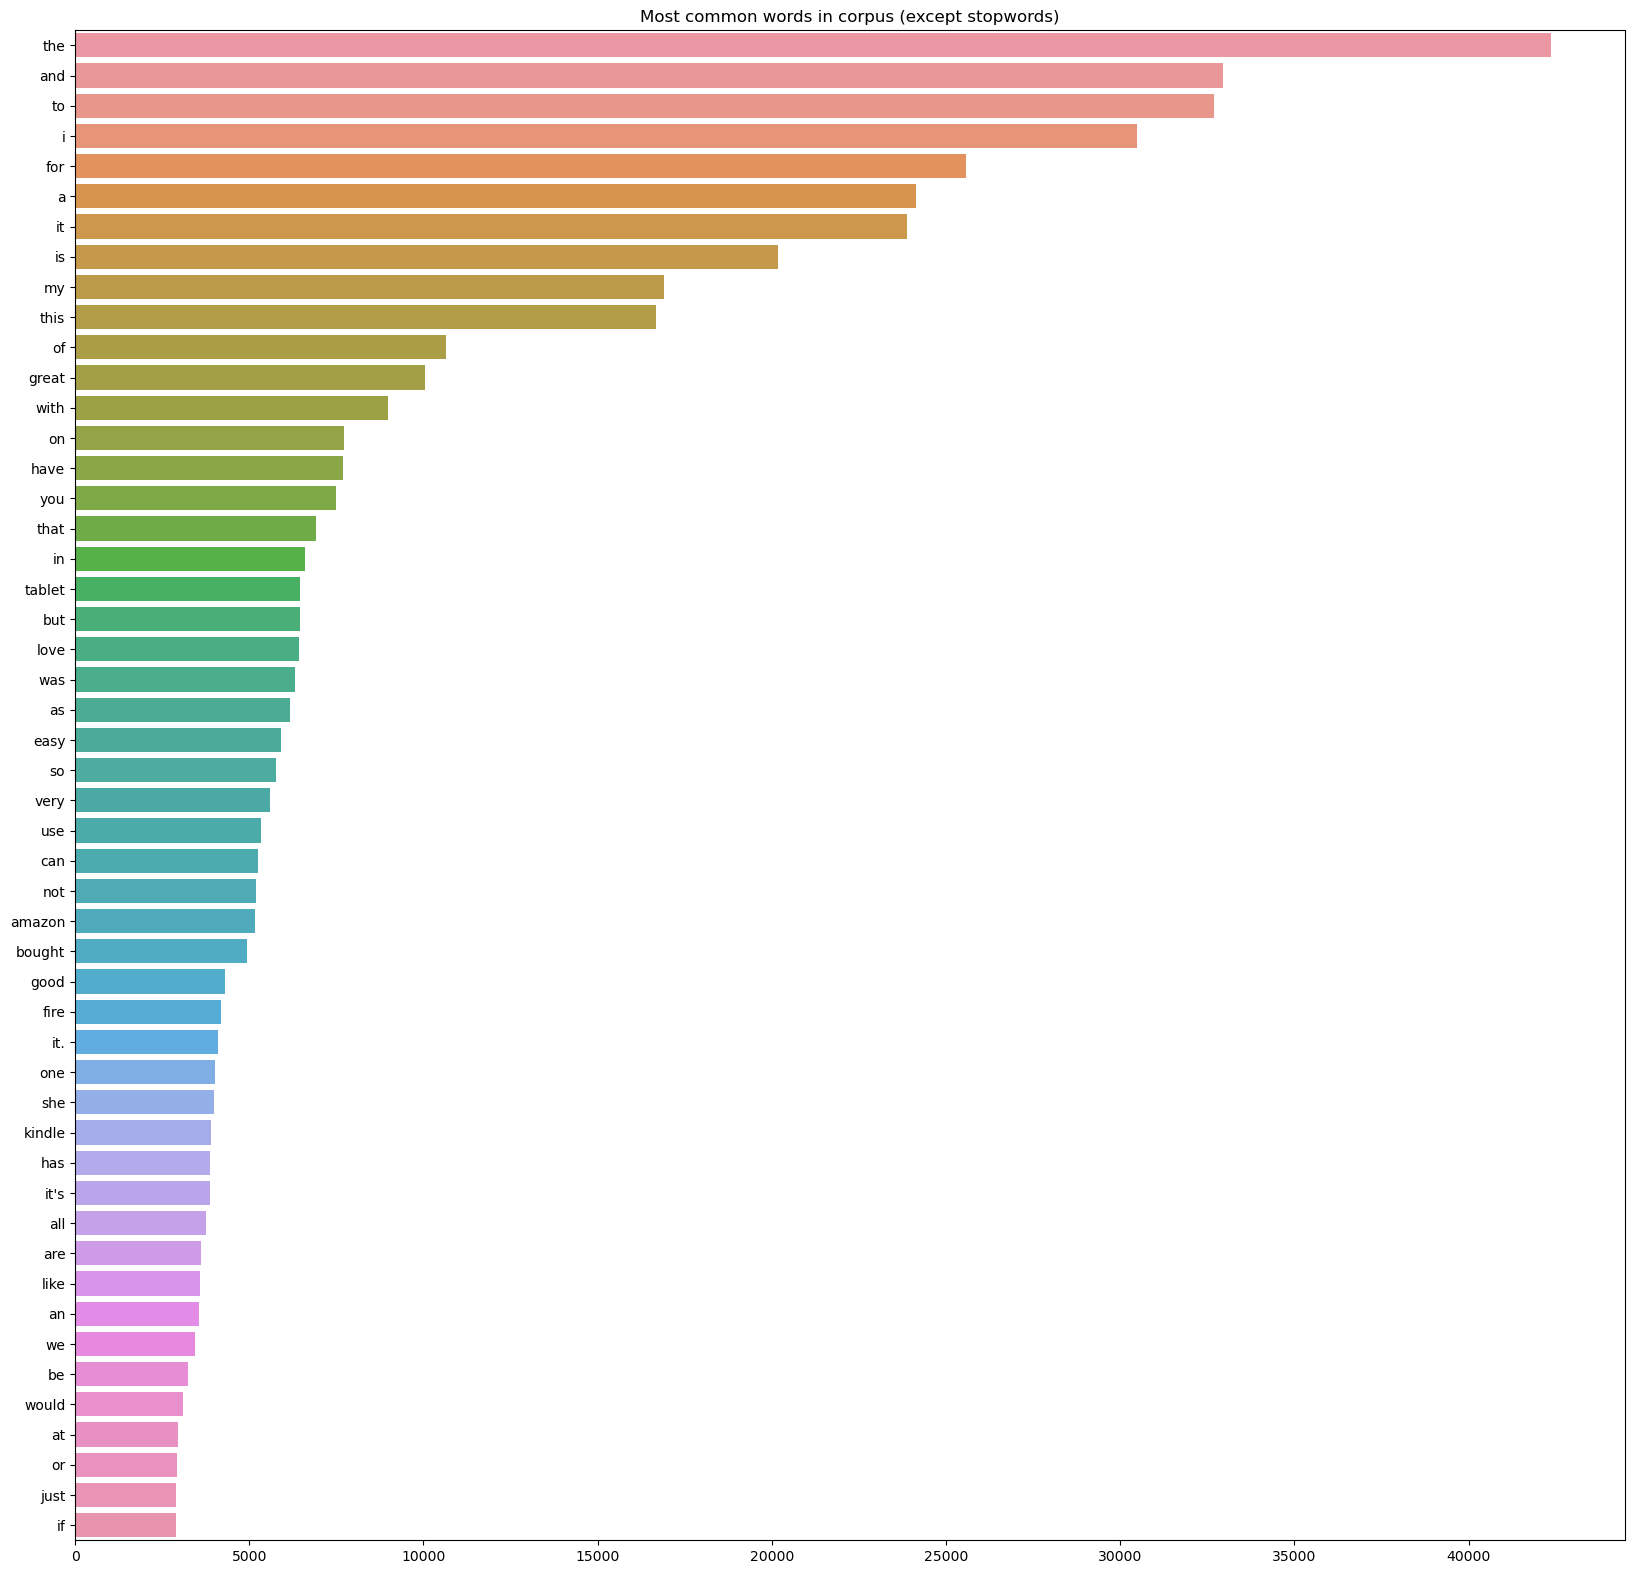

In [30]:
import collections
from collections import defaultdict
corpus=[]
corpus = [w for s in data['reviews.text'].str.split().values.tolist() for w in s]
counter = collections.Counter(corpus)
most_common_words = counter.most_common()

x, y= [], []
for word,count in most_common_words[:50]:
    x.append(word)
    y.append(count)

fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(20, 20), dpi=100)
sns.barplot(x=y,y=x)
plt.title('Most common words in corpus (except stopwords)')
plt.show()

### 3. Box Plot

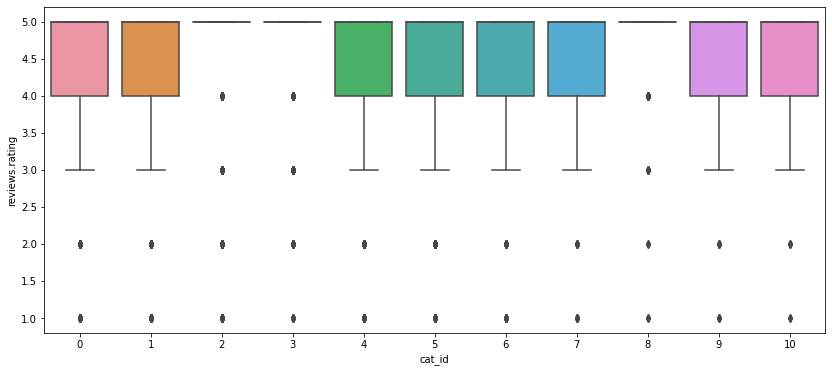

In [32]:
#Distribution of Ratings Across Categories
df_cat = data[data['cat_id']<=10]
fig,ax = plt.subplots(figsize=(14,6))
 
fig = sns.boxplot(x = 'cat_id',y='reviews.rating', data = df_cat)
 
plt.show()

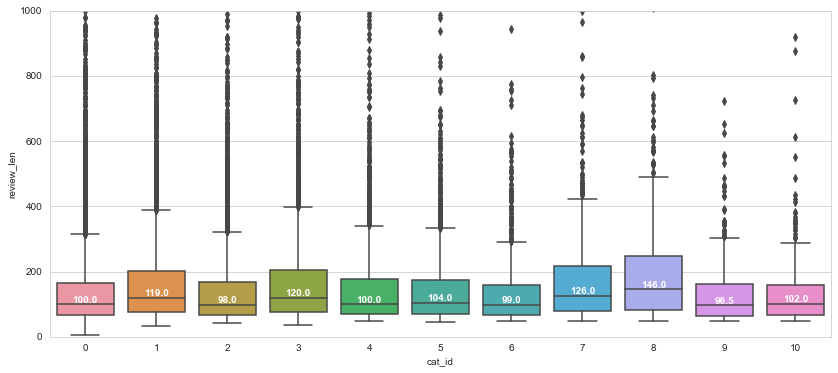

In [33]:
#Distribution of Review length Across Categories
sns.set_style("whitegrid")
fig,ax = plt.subplots(figsize=(14,6))
 
fig = sns.boxplot(x = 'cat_id',y='review_len', data = df_cat)
 
#Displaying Median Value
medians = df_cat.groupby(['cat_id'])['review_len'].median()
vertical_offset = df_cat['review_len'].median() * 0.05
 
for xtick in fig.get_xticks():
    fig.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',color='w',weight='semibold')
 
plt.ylim(0,1000)
 
plt.show()

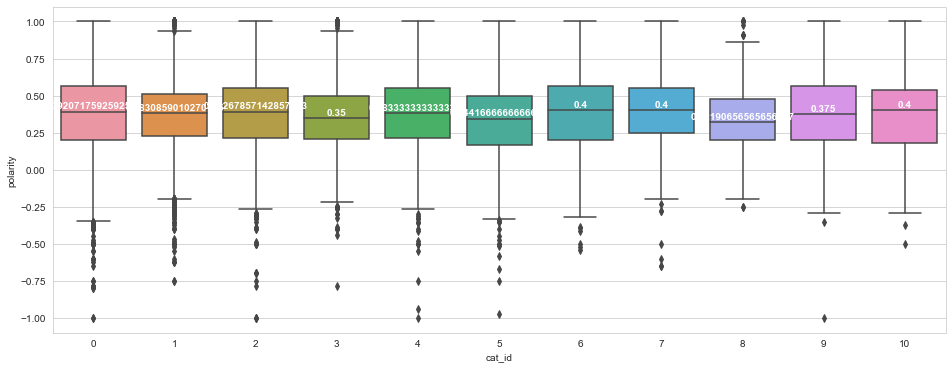

In [34]:
#Distribution of Sentiment Score Across Categories
fig,ax = plt.subplots(figsize=(16,6))
 
fig = sns.boxplot(x = 'cat_id',y='polarity', data = df_cat)
 
medians = df_cat.groupby(['cat_id'])['polarity'].median()
vertical_offset = df_cat['polarity'].median() * 0.05
 
for xtick in fig.get_xticks():
    fig.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',color='w',weight='semibold')
 
plt.show()

**4. Word Cloud**

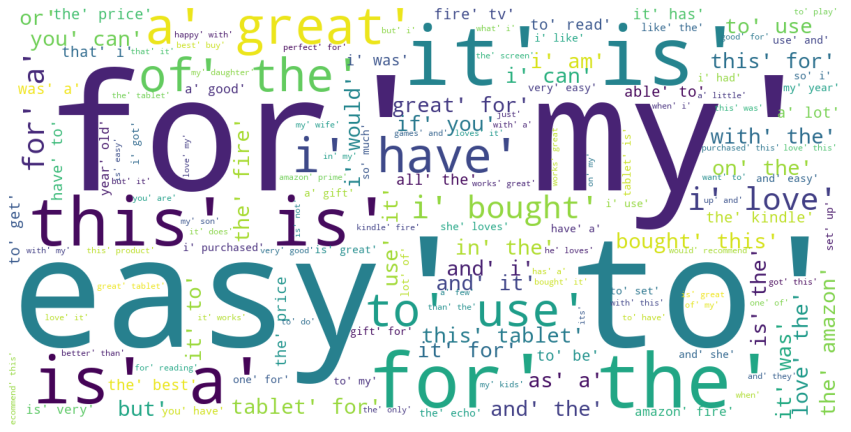

In [35]:
wordcloud = WordCloud(
    background_color='white',
    max_words=150,
    scale=3,
    random_state=1)

wordcloud=wordcloud.generate(str(corpus))
fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

**5. Pie Chart**

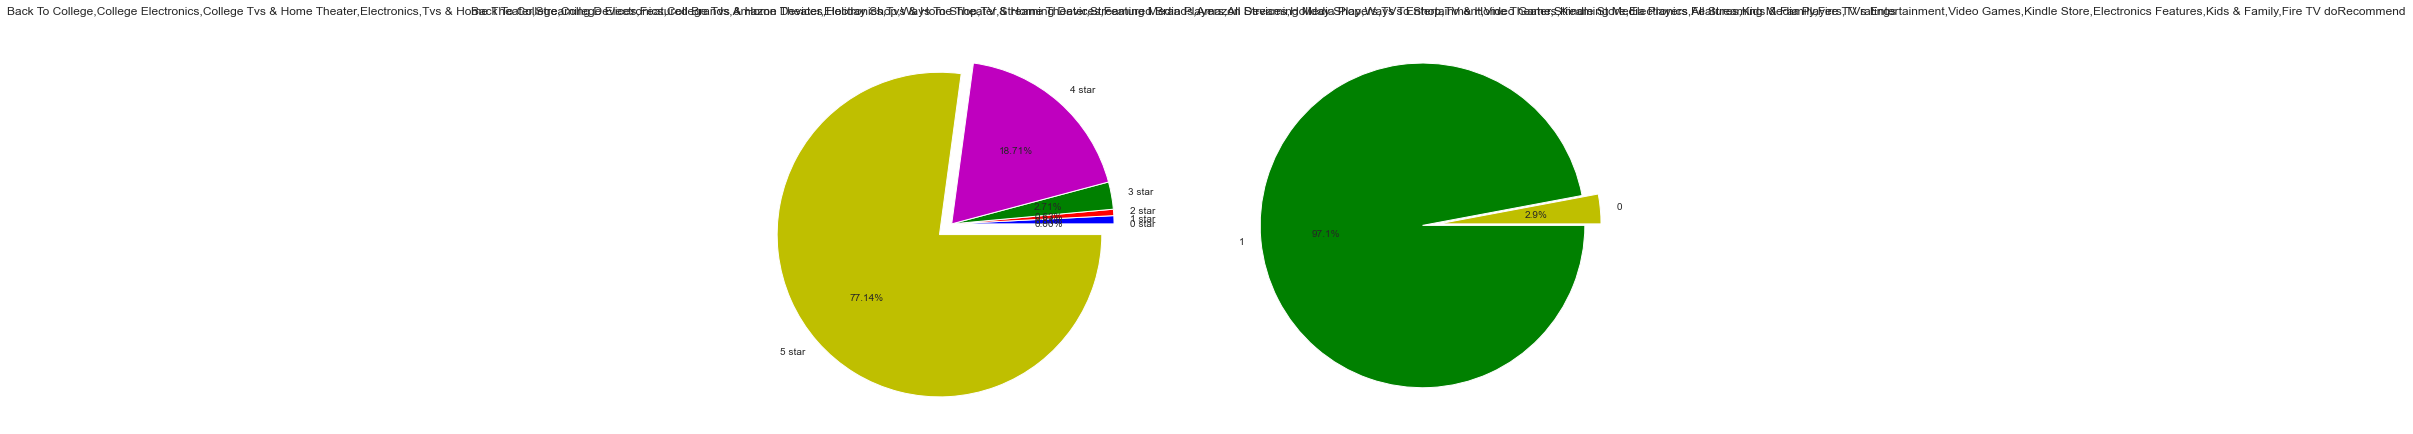

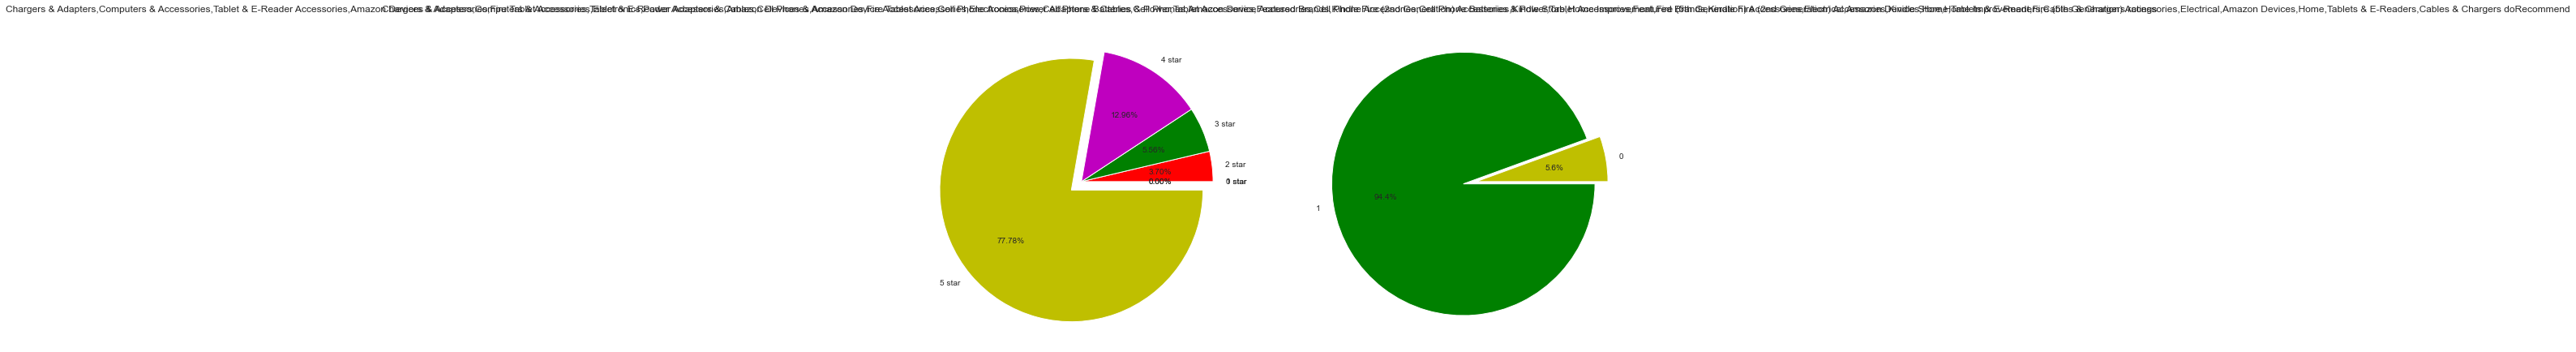

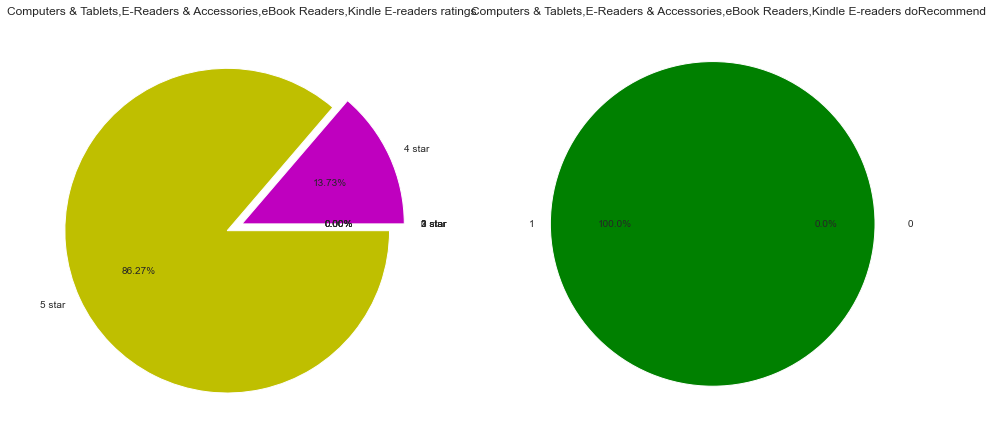

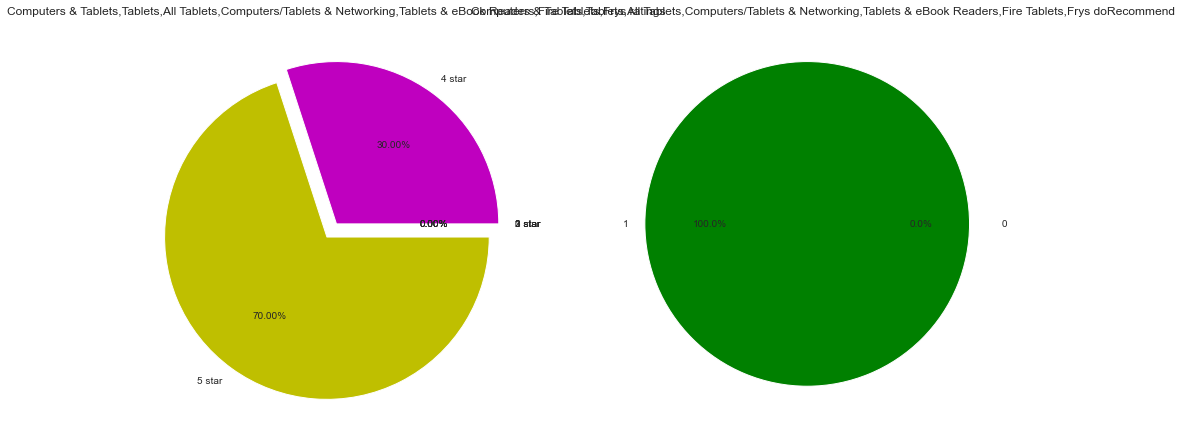

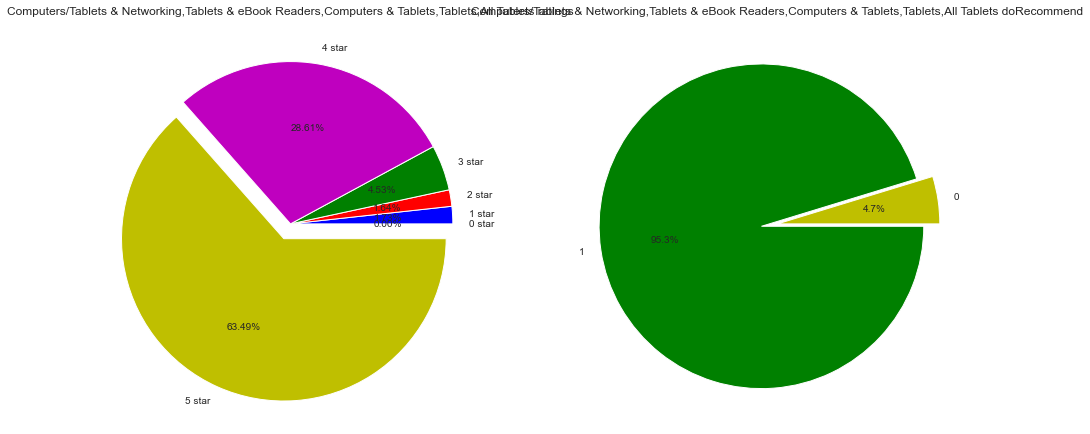

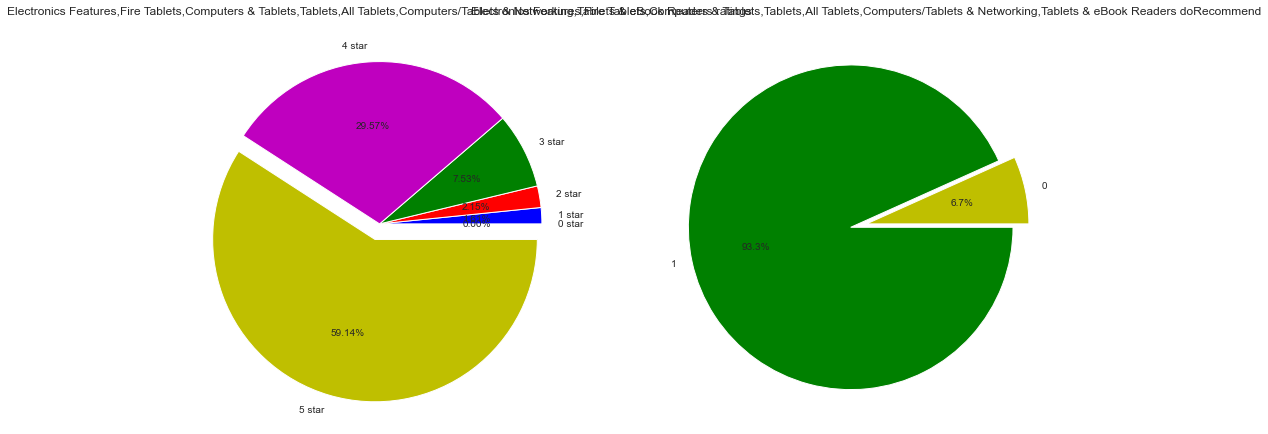

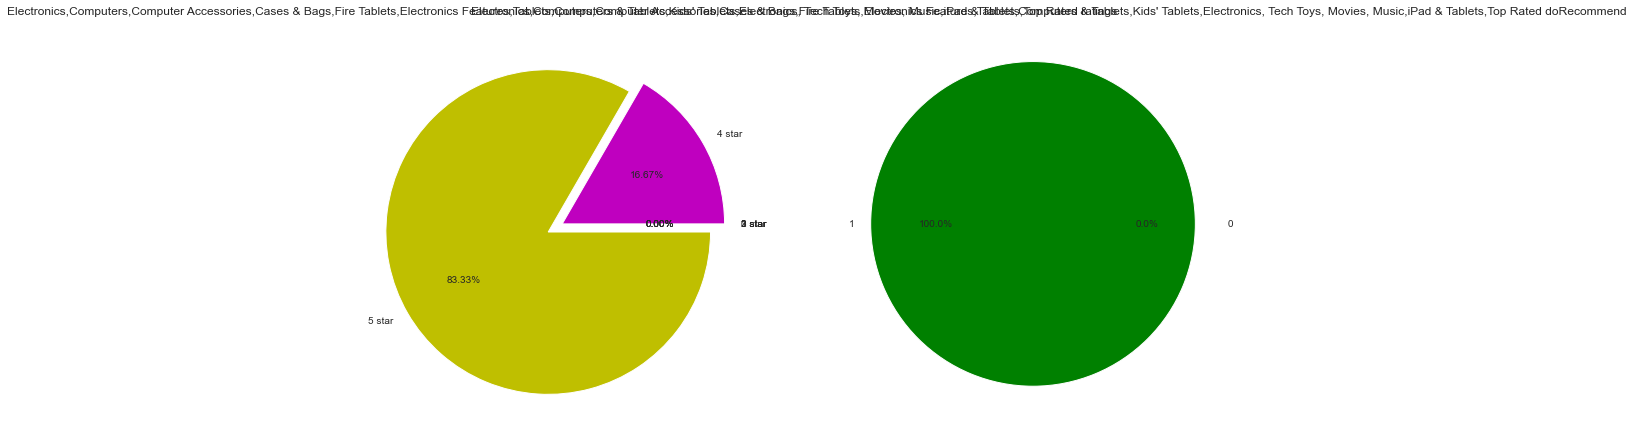

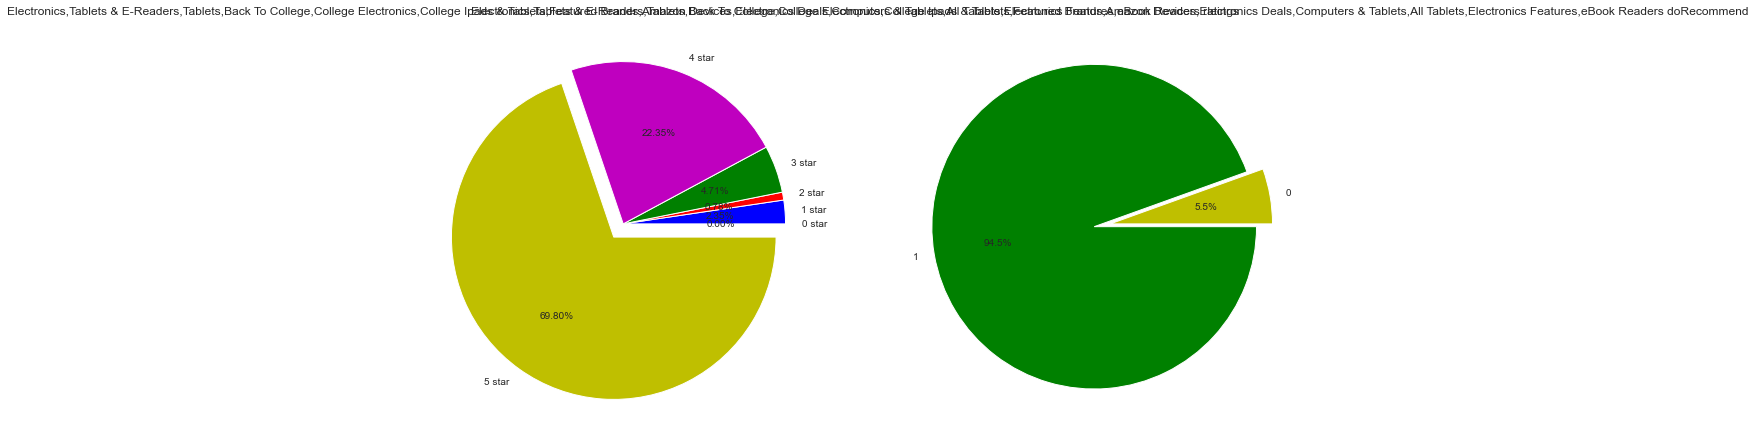

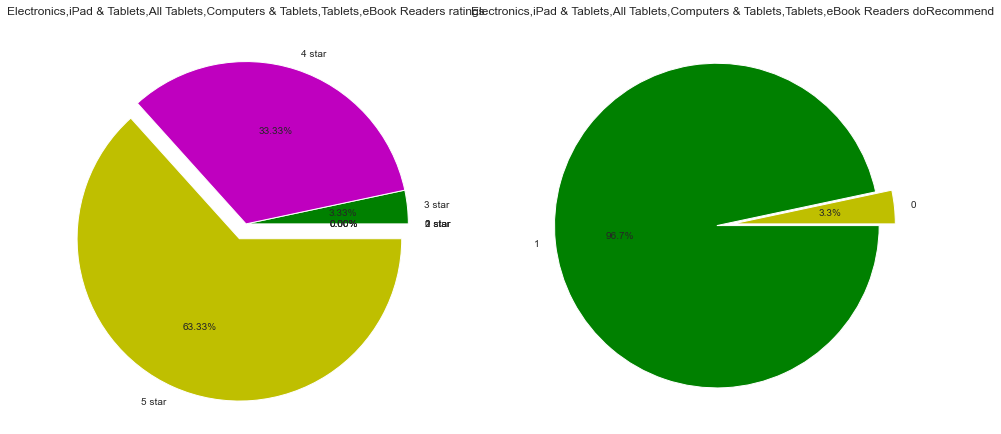

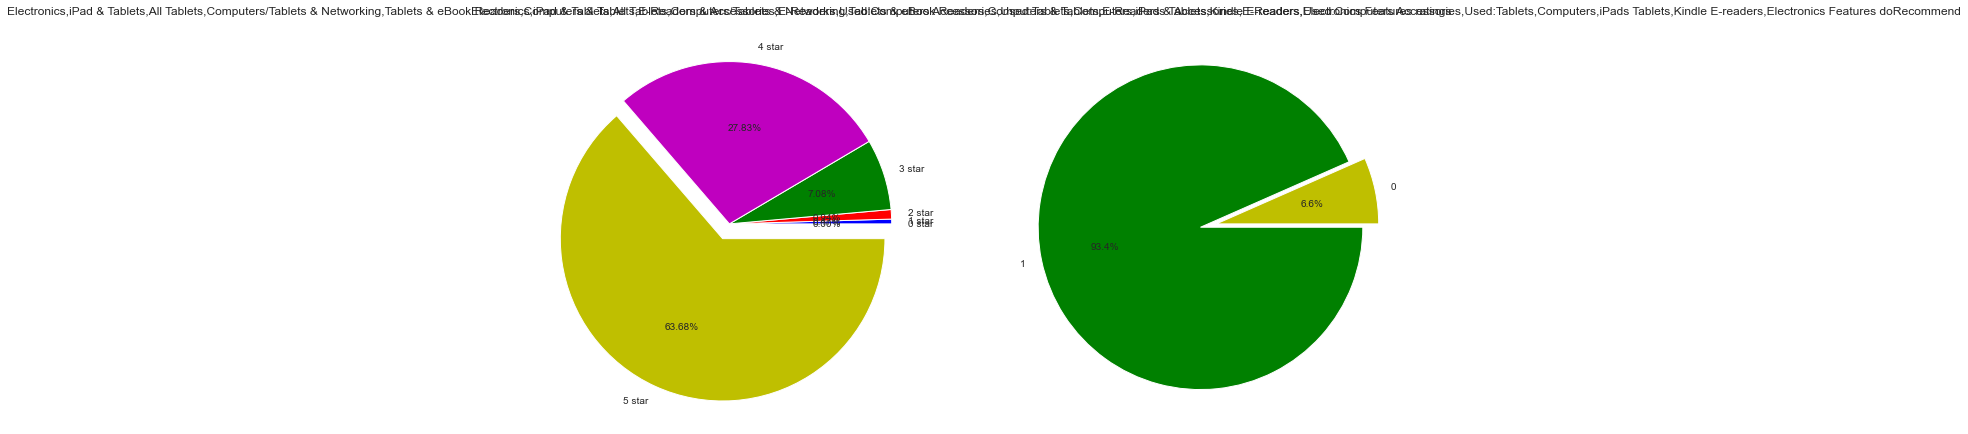

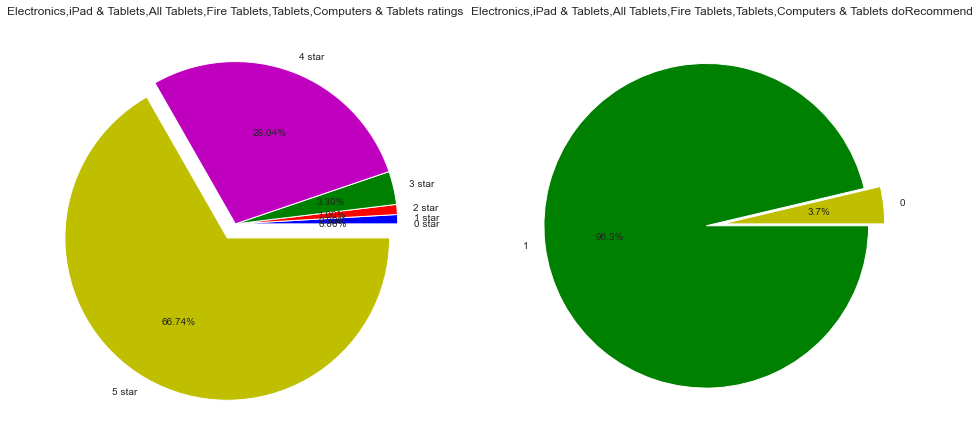

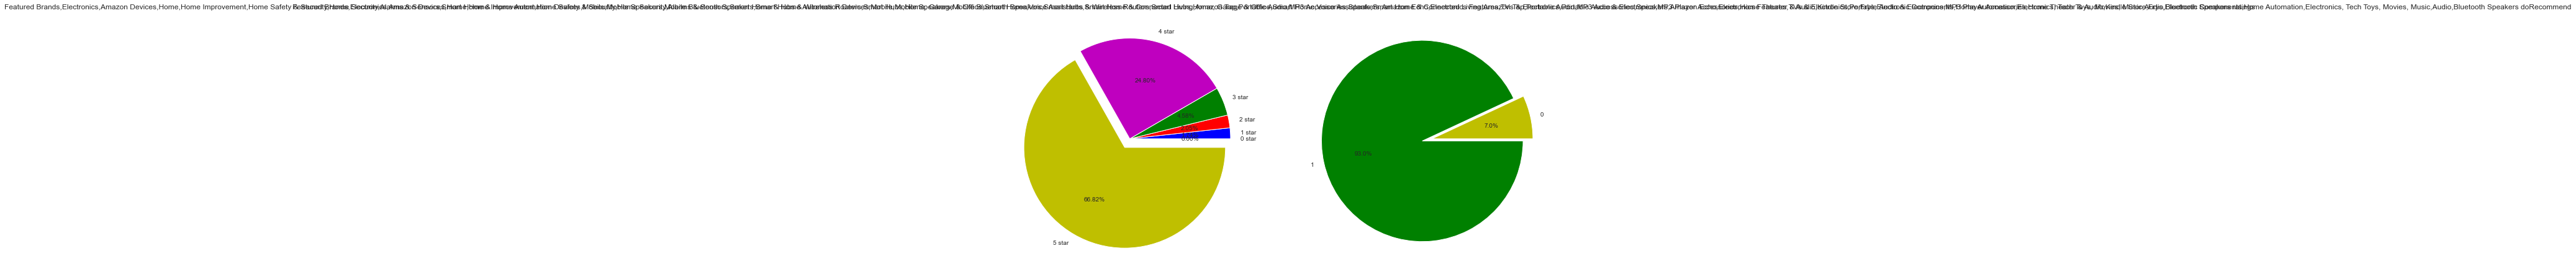

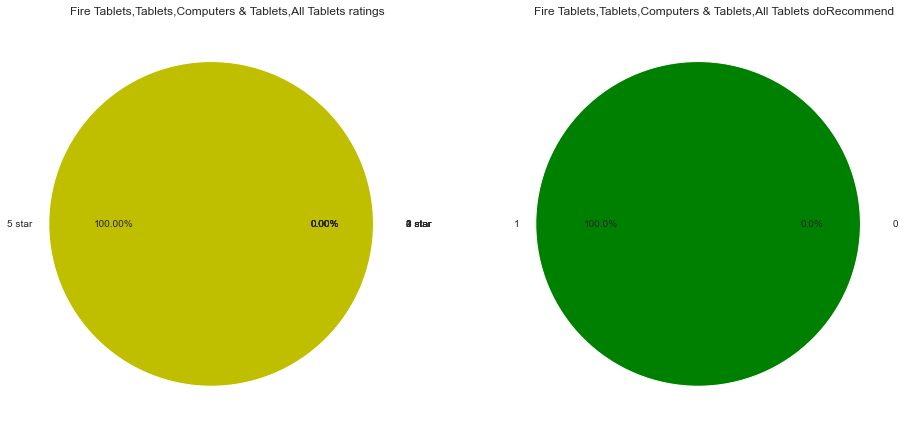

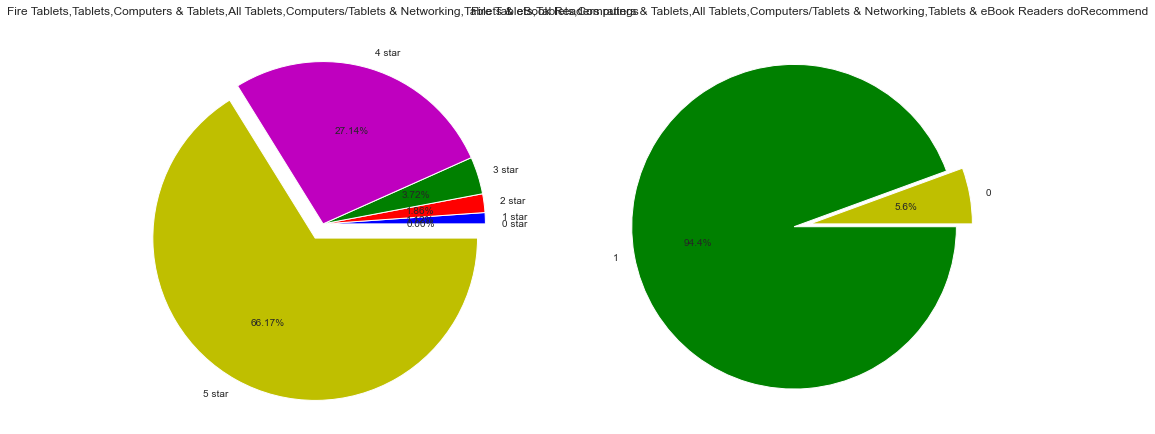

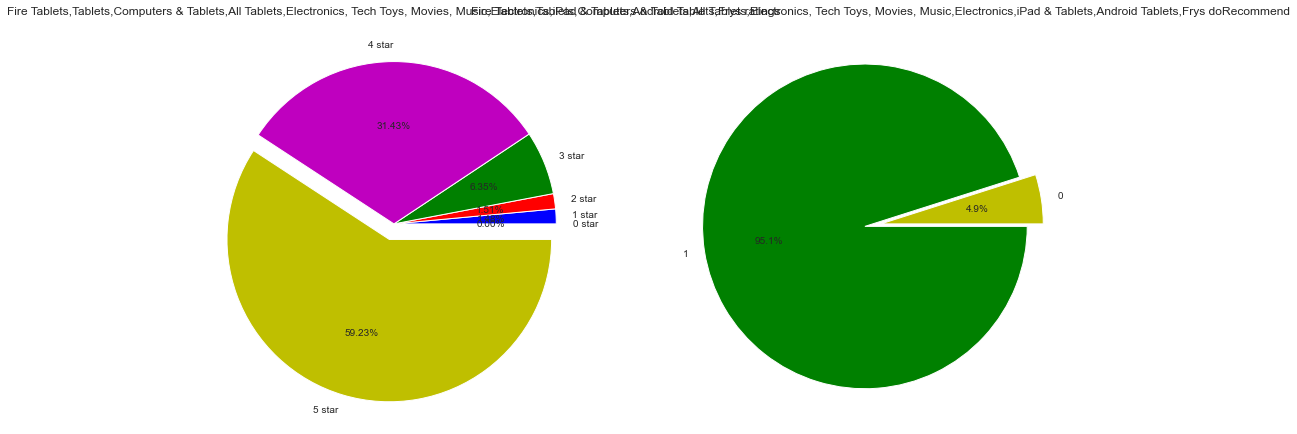

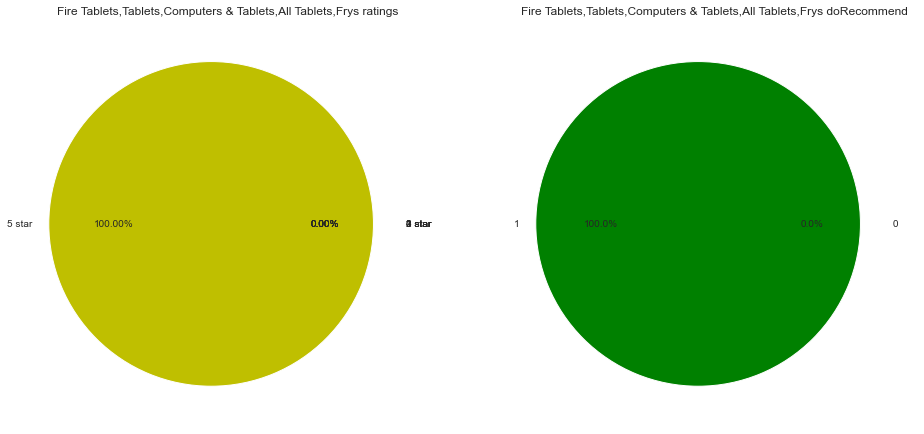

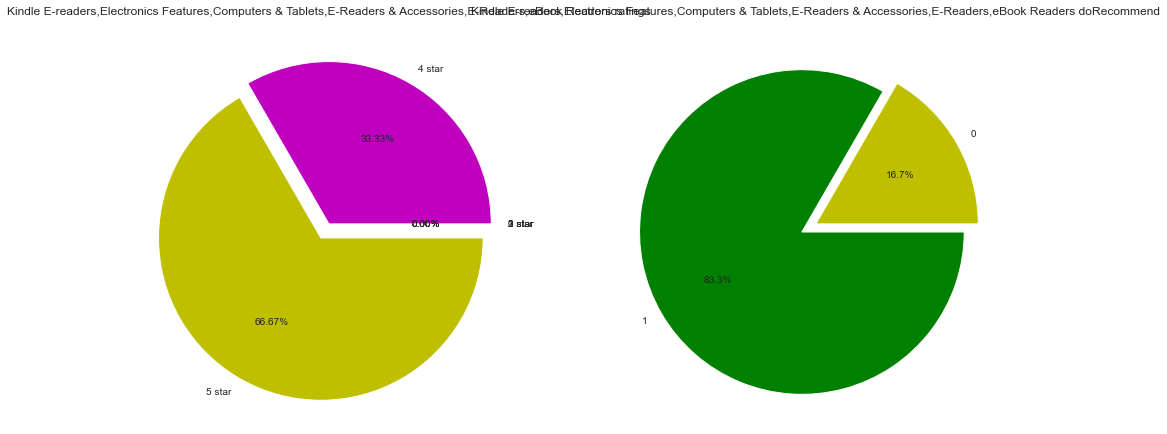

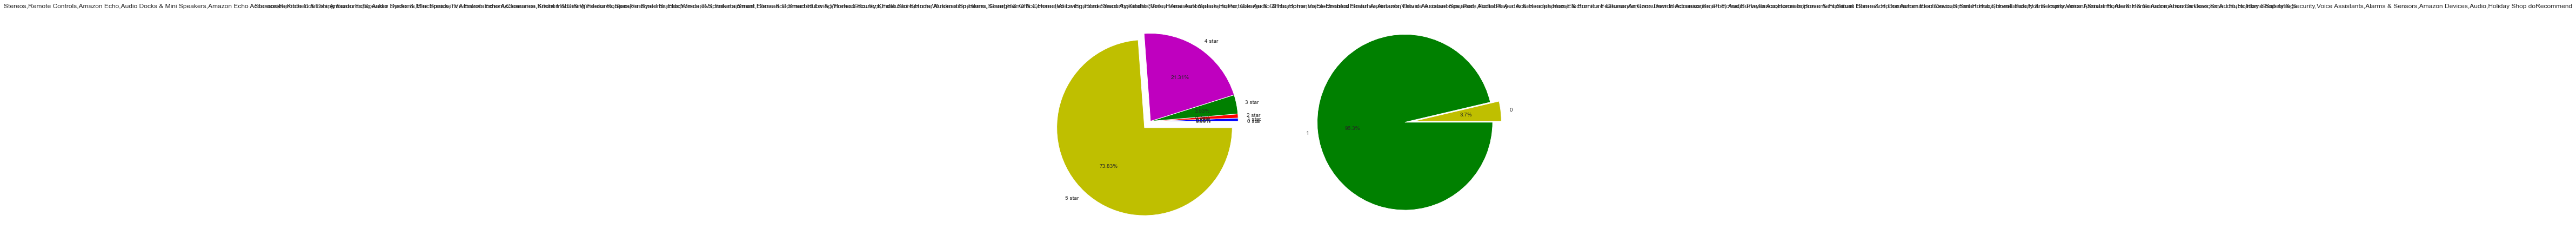

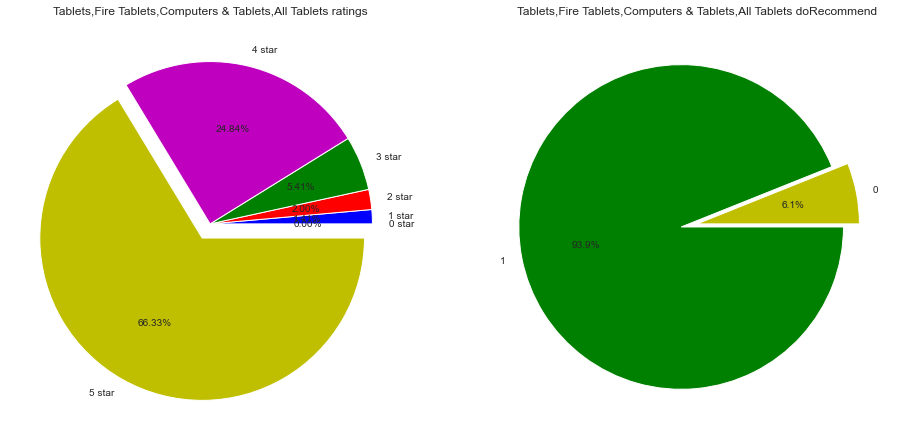

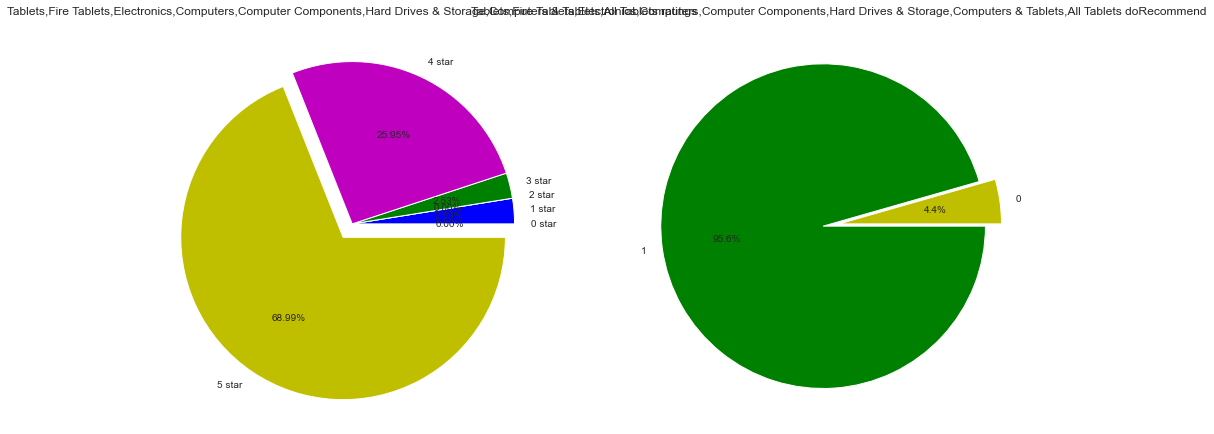

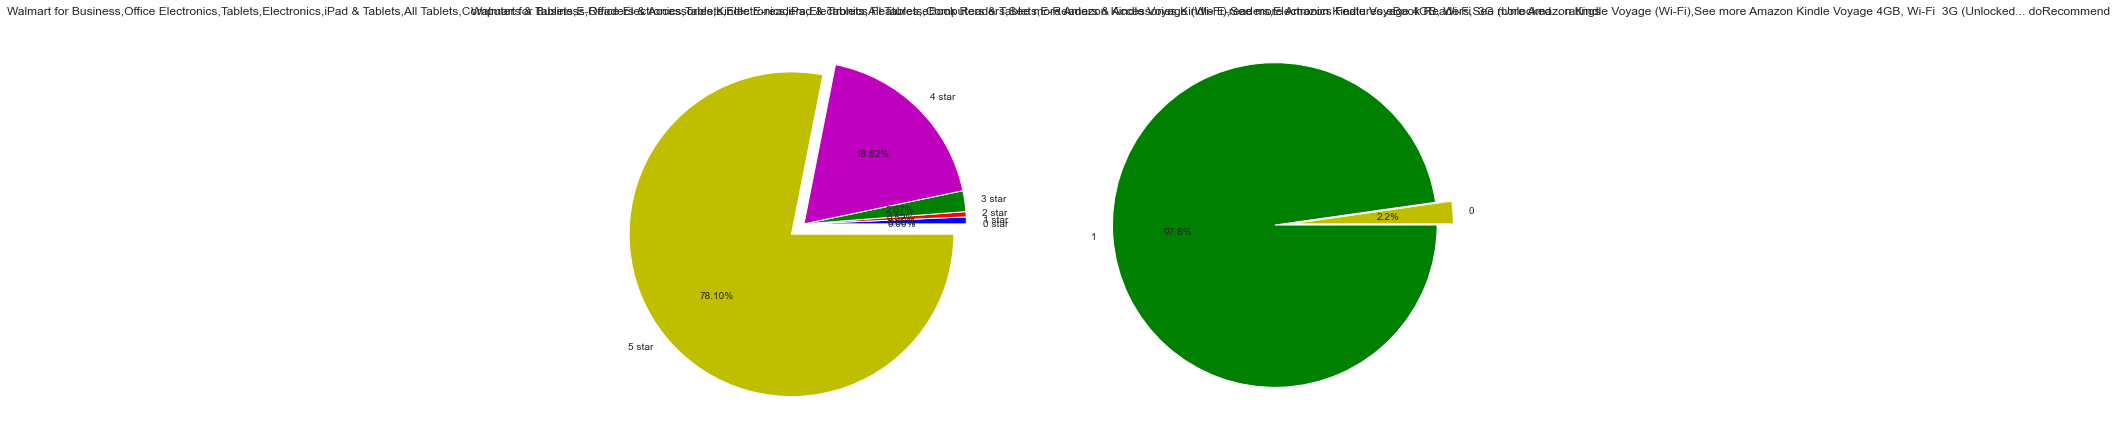

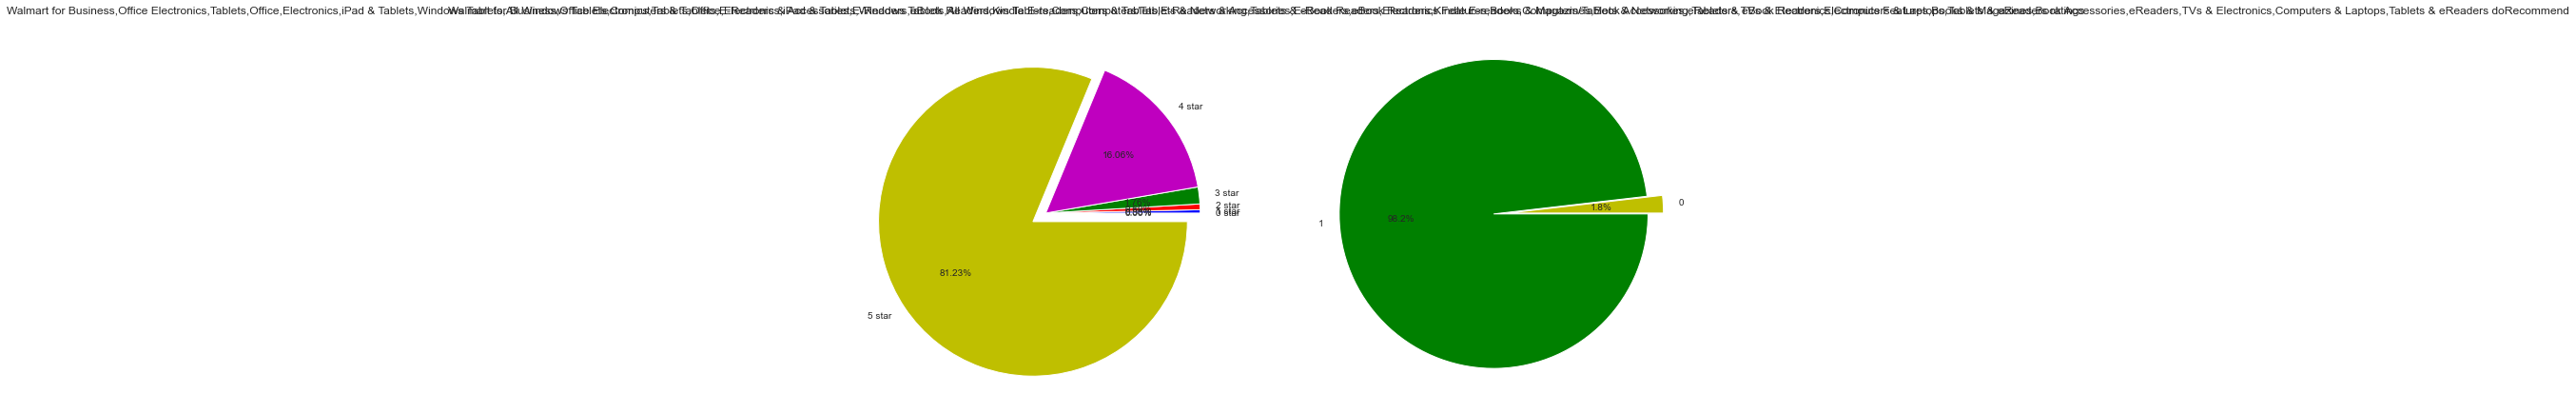

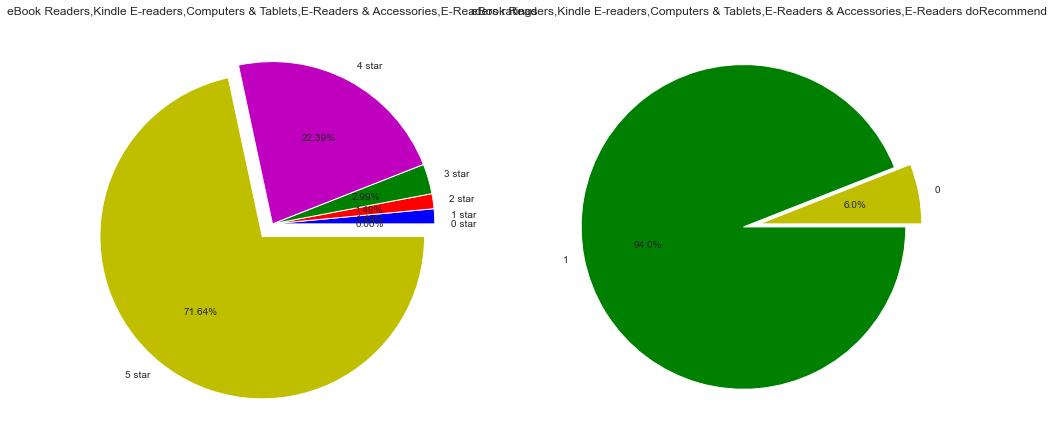

In [36]:
def draw_pie(data,title=None):

    fig = plt.figure(1, figsize=(16, 14))

    count=[]
    labels=[]
    for i in range(int(max(data['reviews.rating'])+1)):
        labels.append(f'{i} star')
        count.append((data['reviews.rating'] == i).sum())

    colors = ['b','b','r','g','m','y']
    explode = [0,0,0,0,0,0.1]
    plt.subplot(1,2,1)
    plt.pie(count, labels=labels, colors=colors, explode=explode,
            autopct='%1.2f%%')
    plt.title(title)
    
    count=[]
    labels=[]
    for i in range(int(2)):
        labels.append(i)
        count.append((data['reviews.doRecommend'] == i).sum())

    colors=['y','g']
    plt.subplot(1,2,2)
    plt.pie(count, labels=labels, colors=colors, explode=[0,0.1],
            autopct='%1.1f%%')
    plt.title(f'{item} doRecommend')

    plt.show()


for item,data in data.groupby('categories'):
    draw_pie(data, title=f'{item} ratings')

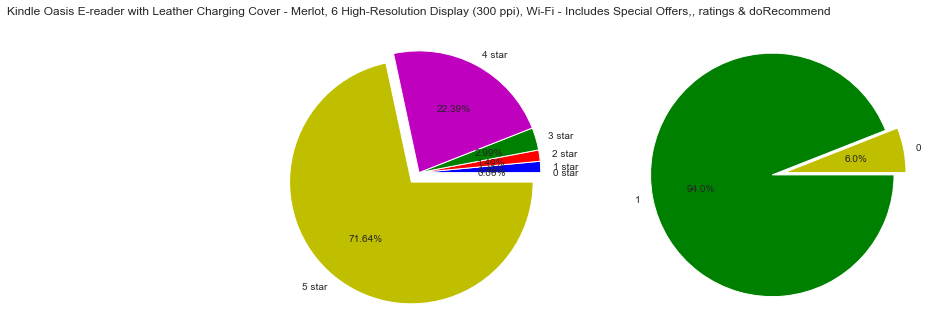

In [38]:
def draw_pie(data,title=None):

    fig = plt.figure(1, figsize=(12, 12))

    count=[]
    labels=[]
    for i in range(int(max(data['reviews.rating'])+1)):
        labels.append(f'{i} star')
        count.append((data['reviews.rating'] == i).sum())

    colors = ['b','b','r','g','m','y']
    explode = [0,0,0,0,0,0.1]
    plt.subplot(1,2,1)
    plt.pie(count, labels=labels, colors=colors, explode=explode,
            autopct='%1.2f%%')
    plt.title(f'{title} ratings & doRecommend')
    
    count=[]
    labels=[]
    for i in range(int(2)):
        labels.append(i)
        count.append((data['reviews.doRecommend'] == i).sum())

    colors=['y','g']
    plt.subplot(1,2,2)
    plt.pie(count, labels=labels, colors=colors, explode=[0,0.1],
            autopct='%1.1f%%')
    plt.show()


for item,data in data.groupby('name'):
    draw_pie(data, title=item)

## MODELS

In [39]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Madasu
[nltk_data]     Deepika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
data['reviews.text'] = data['reviews.text'].apply(lambda x: ' '.join([w for w in x.split(' ') if (w not in STOPWORDS)]))

In [41]:
data['reviews.text'].head(6)

2814         lightweight portable excellent battery life.
2815    like much voyage. shape makes easier holding. ...
2816    replacing older reader without light traveling...
2817    first e-reader. know odd refresh took little g...
2818    kindle awesome. love design it. nothing softwa...
2819    new kindle great gift fantastic entertainment ...
Name: reviews.text, dtype: object

In [42]:
review=pd.DataFrame(data.groupby('reviews.rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
review.head()

,reviews.rating,No of Users
0,5.0,48
1,4.0,15
2,3.0,2
3,2.0,1
4,1.0,1


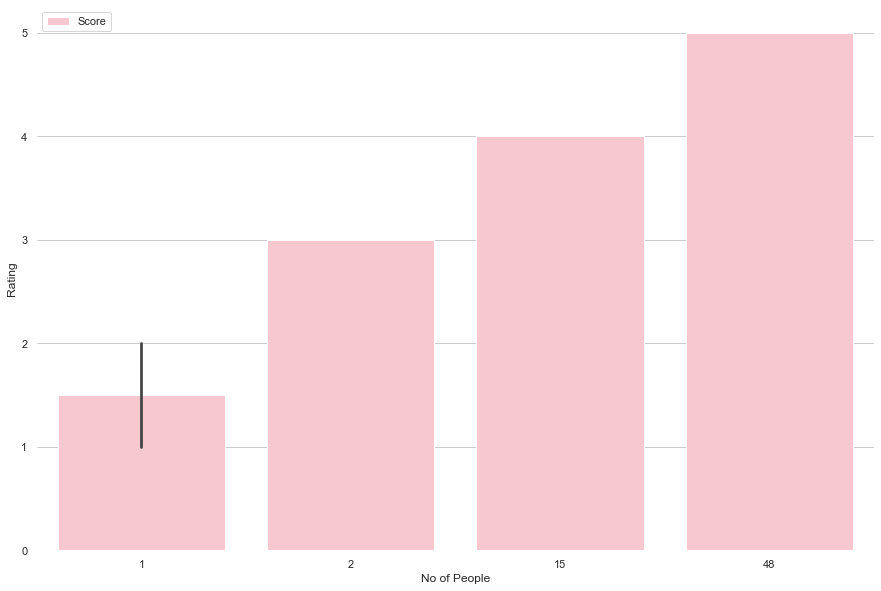

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 10))
sns.set_color_codes("pastel")
sns.barplot(y="reviews.rating", x="No of Users", data=review.iloc[:20, :10],label="Score", color="pink")

ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(xlabel="No of People",ylabel="Rating")
sns.despine(left=True, bottom=True)
plt.show()

In [44]:
permanent = data[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]
mpermanent=permanent.dropna()
mpermanent.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
2814,5.0,lightweight portable excellent battery life.,works great,Purchaser1
2815,5.0,like much voyage. shape makes easier holding. ...,in love,kcladyz
2816,5.0,replacing older reader without light traveling...,great size,Bbshop
2817,4.0,first e-reader. know odd refresh took little g...,very light,diannez
2818,4.0,kindle awesome. love design it. nothing softwa...,great kindle,Brandon


In [45]:
check =  mpermanent[mpermanent["reviews.text"].isnull()]
check.head()

,reviews.rating,reviews.text,reviews.title,reviews.username


In [46]:
actualrating = mpermanent[(mpermanent['reviews.rating'] == 1) | (mpermanent['reviews.rating'] == 5)]
actualrating.shape


(49, 4)

In [47]:
y = actualrating['reviews.rating']
x = actualrating['reviews.text'].reset_index()
# X =x[xindex(False)]

In [48]:
len(y)
# len(X)

49

In [49]:
X = x['reviews.text']
print(X)

0          lightweight portable excellent battery life.
1     like much voyage. shape makes easier holding. ...
2     replacing older reader without light traveling...
3     new kindle great gift fantastic entertainment ...
4     met expectations! lightweight compact. enjoy u...
5     thought long hard upgrading paperwhite, decide...
6     kindle hdx . wanted something small portable.....
7     easy read books way. enjoyable night bedroom o...
8     second kindle happier . believe would happy so...
9     started buy voyage saw close price oasis, deci...
10    afraid spend much money kindle far glad did. l...
11    great item! would definitely recommend item --...
12    upgraded old kindle keyboard. love ability adj...
13    upgrade means! three year old kindle outperfor...
14    great ereader little pricy. specs voyage far p...
15             great ebook beginner. light good looking
16    kindle time curious oasis. disappoint. compact...
17         battery life unreal! much faster old 

In [50]:
print(len(X))

49


In [51]:
import string
from nltk.corpus import stopwords
# stop=set(stopwords.words('english'))
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [52]:
tokens = X[0].split()
print(tokens)

['lightweight', 'portable', 'excellent', 'battery', 'life.']


In [54]:
nltk.download('stopwords')
sample_text = "Hey there! This project is done by Shivani, Deepika and Harini."
print(text_process(sample_text))

['Hey', 'project', 'done', 'Shivani', 'Deepika', 'Harini']


[nltk_data] Downloading package stopwords to C:\Users\Madasu
[nltk_data]     Deepika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
from sklearn.feature_extraction.text import CountVectorizer
# next we need to vectorize our input variable (X)
#we use the count vectoriser function and the analyser we use is the above lines of code
# this should return a vector array
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [56]:
len(bow_transformer.vocabulary_)

878

In [57]:
review_24 = X[24]

In [58]:
bow_25 = bow_transformer.transform([review_24])
bow_25

<1x878 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [60]:
print(bow_25)

  (0, 98)	1
  (0, 210)	1
  (0, 265)	1
  (0, 402)	1
  (0, 451)	1


In [61]:
X = bow_transformer.transform(X)

In [62]:
#Lets start training the model
from sklearn.model_selection import train_test_split
#using 30% of the data for testing, this will be revised once we do not get the desired accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [63]:
positive_review = actualrating['reviews.text']
positive_review

2814         lightweight portable excellent battery life.
2815    like much voyage. shape makes easier holding. ...
2816    replacing older reader without light traveling...
2819    new kindle great gift fantastic entertainment ...
2820    met expectations! lightweight compact. enjoy u...
2821    thought long hard upgrading paperwhite, decide...
2822    kindle hdx . wanted something small portable.....
2824    easy read books way. enjoyable night bedroom o...
2826    second kindle happier . believe would happy so...
2827    started buy voyage saw close price oasis, deci...
2828    afraid spend much money kindle far glad did. l...
2829    great item! would definitely recommend item --...
2831    upgraded old kindle keyboard. love ability adj...
2832    upgrade means! three year old kindle outperfor...
2833    great ereader little pricy. specs voyage far p...
2834             great ebook beginner. light good looking
2835    kindle time curious oasis. disappoint. compact...
2836         b

In [64]:
negative_review = mpermanent['reviews.text']
print(negative_review)

2814         lightweight portable excellent battery life.
2815    like much voyage. shape makes easier holding. ...
2816    replacing older reader without light traveling...
2817    first e-reader. know odd refresh took little g...
2818    kindle awesome. love design it. nothing softwa...
                              ...                        
2876    looking forward bought right popped available ...
2877    used kindle e-readers since amazon introduced ...
2878     kindle easily best one i've ever had. comfort...
2879    best kindle ereader yet. size weight make perf...
2880    actually easier hold paperback, might even lig...
Name: reviews.text, Length: 67, dtype: object


In [65]:
#we need to have a label for 
# lets have a label which group the stars into two groups, 1 for good, 0 for bad 
# so anything more than 3 , 3 being neutral is good, rest bad
# data['label'] = ['1' if reviews.rating > 3 else '0' for reviews.rating in data['reviews.rating']];
mpermanent['label'] = ['1' if star >= 3 else '0' for star in mpermanent['reviews.rating']];

In [66]:
mpermanent

,reviews.rating,reviews.text,reviews.title,reviews.username,label
2814,5.0,lightweight portable excellent battery life.,works great,Purchaser1,1
2815,5.0,like much voyage. shape makes easier holding. ...,in love,kcladyz,1
2816,5.0,replacing older reader without light traveling...,great size,Bbshop,1
2817,4.0,first e-reader. know odd refresh took little g...,very light,diannez,1
2818,4.0,kindle awesome. love design it. nothing softwa...,great kindle,Brandon,1
...,...,...,...,...,...
2876,4.0,looking forward bought right popped available ...,"fantastic, if you can afford it",Nitin,1
2877,5.0,used kindle e-readers since amazon introduced ...,the reviews are right-this is the best kindle ...,rlmgolfer,1
2878,5.0,kindle easily best one i've ever had. comfort...,best kindle yet,somileo,1
2879,5.0,best kindle ereader yet. size weight make perf...,best kindle yet,RobDrob,1


In [67]:
reviews = mpermanent['reviews.text']
labels = mpermanent['label']

In [68]:
reviews

2814         lightweight portable excellent battery life.
2815    like much voyage. shape makes easier holding. ...
2816    replacing older reader without light traveling...
2817    first e-reader. know odd refresh took little g...
2818    kindle awesome. love design it. nothing softwa...
                              ...                        
2876    looking forward bought right popped available ...
2877    used kindle e-readers since amazon introduced ...
2878     kindle easily best one i've ever had. comfort...
2879    best kindle ereader yet. size weight make perf...
2880    actually easier hold paperback, might even lig...
Name: reviews.text, Length: 67, dtype: object

In [69]:
stop = set(stopwords.words('english'))

In [70]:
def clean_document(doco):
    punctuation = string.punctuation
    punc_replace = ''.join([' ' for s in punctuation])
    doco_link_clean = re.sub(r'http\S+', '', doco)
    doco_clean_and = re.sub(r'&\S+', '', doco_link_clean)
    doco_clean_at = re.sub(r'@\S+', '', doco_clean_and)
    doco_clean = doco_clean_at.replace('-', ' ')
    doco_alphas = re.sub(r'\W +', ' ', doco_clean)
    trans_table = str.maketrans(punctuation, punc_replace)
    doco_clean = ' '.join([word.translate(trans_table) for word in doco_alphas.split(' ')])
    doco_clean = doco_clean.split(' ')
    p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
    doco_clean = [word.lower() for word in doco_clean if len(word) > 2]
    doco_clean = ([i for i in doco_clean if i not in stop])
#     doco_clean = [spell(word) for word in doco_clean]
#     p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
#     doco_clean = ([spell(k) for k in doco_clean])
    return doco_clean

In [71]:
# Generate a cleaned reviews array from original review texts
review_cleans = [clean_document(doc) for doc in reviews];
sentences = [' '.join(r) for r in review_cleans ]

In [72]:
print(sentences[7])

thought long hard upgrading paperwhite decided despite beating able actually see one store owned kindle since second generation version far favorite look feel amazing regret purchase one bit disposable income paperwhite suffice significantly smaller price point


In [86]:
#Keras
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

In [88]:
text_sequences = np.array(tokenizer.texts_to_sequences(sentences))
sequence_dict = tokenizer.word_index
word_dict = dict((num, val) for (val, num) in sequence_dict.items())

C:\Users\Madasu Deepika\miniconda3\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [89]:
print(text_sequences)

[list([45, 127, 173, 4, 24])
 list([17, 19, 14, 174, 103, 69, 61, 175, 430, 128, 431, 432, 15, 77, 17, 245, 31])
 list([246, 78, 21, 41, 7, 129, 433, 176, 434, 247, 435, 37, 45, 21, 70, 436, 79, 37, 437, 248, 249, 8, 41, 250, 438, 247, 439, 440, 7, 10, 25, 130, 22, 11, 441, 442, 251, 61])
 list([32, 21, 252, 443, 444, 253, 71, 38, 72, 28, 37, 7, 104, 177, 445])
 list([1, 178, 28, 62, 446, 254, 255, 179, 1, 80, 256, 103, 19, 46, 69, 8, 105, 257, 258, 259, 26, 180, 1, 15, 258, 259, 260])
 list([55, 1, 18, 261, 262, 447, 263])
 list([264, 448, 45, 81, 181, 131, 63])
 list([132, 47, 182, 265, 12, 106, 266, 449, 56, 133, 64, 5, 450, 134, 1, 39, 107, 183, 451, 73, 452, 77, 184, 453, 454, 267, 5, 185, 455, 456, 12, 457, 458, 268, 26, 459])
 list([1, 269, 186, 187, 37, 127, 460, 270, 82, 83, 1, 2, 461, 462, 1, 2, 463, 127, 70, 271, 464, 57, 249, 37, 135, 465, 11, 178, 272, 466, 79, 179, 269, 136, 84, 71, 467, 12, 5, 137, 468, 9, 469, 4, 9, 470, 47, 33, 6, 26, 471, 39, 273, 15, 29, 42, 9, 74, 2

In [90]:
print(sequence_dict)

{'kindle': 1, 'oasis': 2, 'cover': 3, 'battery': 4, 'one': 5, 'reading': 6, 'light': 7, 'read': 8, 'case': 9, 'easy': 10, 'screen': 11, 'paperwhite': 12, 'device': 13, 'voyage': 14, 'would': 15, 'page': 16, 'like': 17, 'great': 18, 'much': 19, 'best': 20, 'reader': 21, 'hand': 22, 'charge': 23, 'life': 24, 'hold': 25, 'price': 26, 'buttons': 27, 'love': 28, 'still': 29, 'use': 30, 'book': 31, 'first': 32, 'time': 33, 'size': 34, 'really': 35, 'turn': 36, 'small': 37, 'get': 38, 'since': 39, 'charging': 40, 'without': 41, 'buy': 42, 'amazon': 43, 'worth': 44, 'lightweight': 45, 'comfortable': 46, 'long': 47, 'also': 48, 'nice': 49, 'think': 50, 'even': 51, 'lot': 52, 'well': 53, 'bought': 54, 'new': 55, 'able': 56, 'back': 57, 'upgrade': 58, 'better': 59, 'day': 60, 'holding': 61, 'design': 62, 'product': 63, 'see': 64, 'weight': 65, 'make': 66, 'months': 67, 'always': 68, 'easier': 69, 'fits': 70, 'little': 71, 'used': 72, 'far': 73, 'keep': 74, 'white': 75, 'anywhere': 76, 'look': 77,

In [91]:
print(word_dict)

{1: 'kindle', 2: 'oasis', 3: 'cover', 4: 'battery', 5: 'one', 6: 'reading', 7: 'light', 8: 'read', 9: 'case', 10: 'easy', 11: 'screen', 12: 'paperwhite', 13: 'device', 14: 'voyage', 15: 'would', 16: 'page', 17: 'like', 18: 'great', 19: 'much', 20: 'best', 21: 'reader', 22: 'hand', 23: 'charge', 24: 'life', 25: 'hold', 26: 'price', 27: 'buttons', 28: 'love', 29: 'still', 30: 'use', 31: 'book', 32: 'first', 33: 'time', 34: 'size', 35: 'really', 36: 'turn', 37: 'small', 38: 'get', 39: 'since', 40: 'charging', 41: 'without', 42: 'buy', 43: 'amazon', 44: 'worth', 45: 'lightweight', 46: 'comfortable', 47: 'long', 48: 'also', 49: 'nice', 50: 'think', 51: 'even', 52: 'lot', 53: 'well', 54: 'bought', 55: 'new', 56: 'able', 57: 'back', 58: 'upgrade', 59: 'better', 60: 'day', 61: 'holding', 62: 'design', 63: 'product', 64: 'see', 65: 'weight', 66: 'make', 67: 'months', 68: 'always', 69: 'easier', 70: 'fits', 71: 'little', 72: 'used', 73: 'far', 74: 'keep', 75: 'white', 76: 'anywhere', 77: 'look',

In [92]:
reviews_encoded = [];
for i,review in enumerate(review_cleans):
    reviews_encoded.append([sequence_dict[x] for x in review]);

(array([0., 0., 0., 0., 0., 4., 2., 6., 0., 4., 2., 1., 1., 1., 1., 2., 1.,
        2., 1., 0., 0., 1., 4., 2.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Patch objects>)

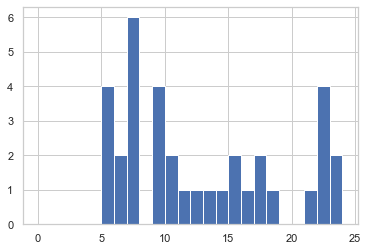

In [93]:
lengths = [len(x) for x in reviews_encoded]
plt.hist(lengths, bins=range(25))

In [94]:
print(reviews_encoded)

[[45, 127, 173, 4, 24], [17, 19, 14, 174, 103, 69, 61, 175, 430, 128, 431, 432, 15, 77, 17, 245, 31], [246, 78, 21, 41, 7, 129, 433, 176, 434, 247, 435, 37, 45, 21, 70, 436, 79, 37, 437, 248, 249, 8, 41, 250, 438, 247, 439, 440, 7, 10, 25, 130, 22, 11, 441, 442, 251, 61], [32, 21, 252, 443, 444, 253, 71, 38, 72, 28, 37, 7, 104, 177, 445], [1, 178, 28, 62, 446, 254, 255, 179, 1, 80, 256, 103, 19, 46, 69, 8, 105, 257, 258, 259, 26, 180, 1, 15, 258, 259, 260], [55, 1, 18, 261, 262, 447, 263], [264, 448, 45, 81, 181, 131, 63], [132, 47, 182, 265, 12, 106, 266, 449, 56, 133, 64, 5, 450, 134, 1, 39, 107, 183, 451, 73, 452, 77, 184, 453, 454, 267, 5, 185, 455, 456, 12, 457, 458, 268, 26, 459], [1, 269, 186, 187, 37, 127, 460, 270, 82, 83, 1, 2, 461, 462, 1, 2, 463, 127, 70, 271, 464, 57, 249, 37, 135, 465, 11, 178, 272, 466, 79, 179, 269, 136, 84, 71, 467, 12, 5, 137, 468, 9, 469, 4, 9, 470, 47, 33, 6, 26, 471, 39, 273, 15, 29, 42, 9, 74, 274, 9, 2, 85, 188, 108, 472, 138, 138, 473, 138, 474,

In [95]:
max_cap =8;
X = pad_sequences(reviews_encoded, maxlen=max_cap, truncating='post')
Y = np.array([[0,1] if '0' in label else [1,0] for label in labels])

In [96]:
np.random.seed(1024);
random_posits = np.arange(len(X))
np.random.shuffle(random_posits);

In [97]:
X = X[random_posits];
Y = Y[random_posits];

In [98]:
train_cap = int(0.85 * len(X));
dev_cap = int(0.93 * len(X));

In [99]:
X_train, Y_train = X[:train_cap], Y[:train_cap]
X_dev, Y_dev = X[train_cap:dev_cap], Y[train_cap:dev_cap]
X_test1, Y_test1 = X[dev_cap:], Y[dev_cap:]

# LSTM MODEL

In [102]:
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import eval

from keras.layers import LSTM
from keras.layers.embeddings import Embedding


model1 = Sequential();
model1.add(Embedding(len(word_dict)+1, max_cap, input_length=max_cap));
#adding a LSTM layer of dim 1--
model1.add(LSTM(150, return_sequences=True));
model1.add(LSTM(150, return_sequences=False));
#adding a dense layer with activation function of relu
model1.add(Dense(100, activation='relu'));#best 50,relu
#adding the final output activation with activation function of softmax
model1.add(Dense(2, activation='sigmoid'));
print(model1.summary());
optimizer = Adam(lr=0.0001, decay=0.0001);

model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# fit model and run it for 5 epochs
history = model1.fit(X_train, Y_train, batch_size=16, epochs=5, validation_data=(X_dev, Y_dev))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 8, 8)              106888    
                                                                 
 lstm_4 (LSTM)               (None, 8, 150)            95400     
                                                                 
 lstm_5 (LSTM)               (None, 150)               180600    
                                                                 
 dense_4 (Dense)             (None, 100)               15100     
                                                                 
 dense_5 (Dense)             (None, 2)                 202       
                                                                 
Total params: 398,190
Trainable params: 398,190
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1840/1840 [==============================] - 159s 84ms/step - loss: 0.1266 - accuracy: 0.9763 - val_loss: 0.0997 - val_accuracy: 0.9769
Epoch 2/5
1840/1840 [==============================] - 130s 71ms/step - loss: 0.0879 - accuracy: 0.9767 - val_loss: 0.0893 - val_accuracy: 0.9769
Epoch 3/5
1840/1840 [==============================] - 103s 56ms/step - loss: 0.0777 - accuracy: 0.9772 - val_loss: 0.0924 - val_accuracy: 0.9772
Epoch 4/5
1840/1840 [==============================] - 132s 72ms/step - loss: 0.0720 - accuracy: 0.9780 - val_loss: 0.0942 - val_accuracy: 0.9772
Epoch 5/5
1840/1840 [==============================] - 149s 81ms/step - loss: 0.0672 - accuracy: 0.9791 - val_loss: 0.0960 - val_accuracy: 0.9769


In [103]:
score = model1.evaluate(X_test1, Y_test1)
print("Test accuracy: %0.4f%%" % (score[1]*100))

76/76 [==============================] - 1s 9ms/step - loss: 0.1052 - accuracy: 0.9732
Test accuracy: 97.3185%
